<a href="https://colab.research.google.com/github/vale286/Technical-Assignment_SIC_Group-39/blob/main/Machine_Learning_Baptista_Yohana_Vallen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Studi Kasus Mengetahui Hasil R2 dsn RMSE Pada Dataset


Columns in the dataset: ['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
Specified features: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type']
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.85      0.57      0.69        61

    accuracy                           0.98      2000
   macro avg       0.92      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000

R² score: 0.4589064838221495
RMSE: 0.12649110640673517


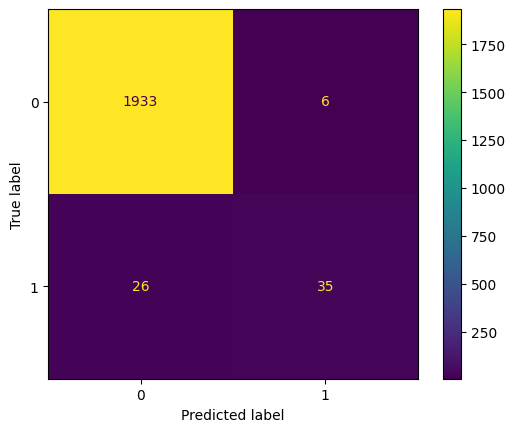

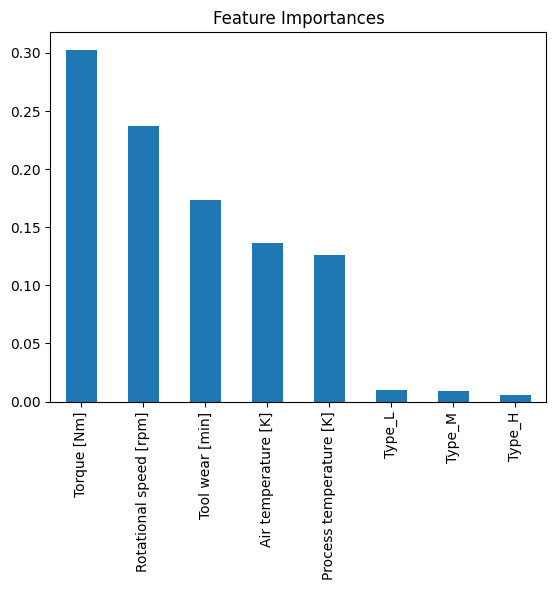

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Membaca dataset
df = pd.read_csv('ai4i2020.csv')
df.head()

# Print column names to check for discrepancies
print("Columns in the dataset:", df.columns.tolist())

# Mengidentifikasi fitur dan label
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type']
label = 'Machine failure'

# Print the features to check for discrepancies
print("Specified features:", features)

# Check if specified features exist in the DataFrame
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print("There is missing features in the DataFrame:", missing_features)
else:
    X = df[features]
    y = df[label]

    # Membagi data menjadi set pelatihan dan pengujian
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Pra-pemrosesan data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']),
            ('cat', OneHotEncoder(), ['Type'])
        ])

    # Membuat pipeline dengan RandomForest
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Melatih model
    pipeline.fit(X_train, y_train)

    # Memprediksi dan evaluasi model
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Calculate and print R² score
    r2 = r2_score(y_test, y_pred)
    print("R² score:", r2)

    # Calculate and print RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE:", rmse)

    # Visualisasi confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    disp.plot()
    plt.show()

    # Visualisasi fitur penting
    importances = pipeline.named_steps['classifier'].feature_importances_
    feature_names = preprocessor.transformers_[0][2] + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(['Type']))
    feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    # Plot fitur penting
    feature_importances.plot(kind='bar')
    plt.title('Feature Importances')
    plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defining the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Defining the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}

# Performing Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict and evaluate
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² score:", r2)
print("RMSE:", rmse)


R² score: 0.47581565620270727
RMSE: 0.12449899597988733
